In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import joblib
import seaborn as sns
import calendar
import os
import time
from numpy import genfromtxt
from datetime import datetime, timedelta
from collections import OrderedDict
from IPython.display import clear_output
# Data helper modules
from helpers import *
from constants import *

csvToNumpy(file_names,raw_data_url)
plt.style.use('seaborn-whitegrid')
data_url = 'database'

In [4]:
data_files

['200412COVID19MEXICO.npy',
 '200413COVID19MEXICO.npy',
 '200414COVID19MEXICO.npy',
 '200415COVID19MEXICO.npy',
 '200416COVID19MEXICO.npy',
 '200417COVID19MEXICO.npy',
 '200418COVID19MEXICO.npy',
 '200419COVID19MEXICO.npy',
 '200420COVID19MEXICO.npy',
 '200421COVID19MEXICO.npy',
 '200422COVID19MEXICO.npy',
 '200423COVID19MEXICO.npy',
 '200424COVID19MEXICO.npy',
 '200425COVID19MEXICO.npy',
 '200426COVID19MEXICO.npy',
 '200427COVID19MEXICO.npy',
 '200428COVID19MEXICO.npy',
 '200429COVID19MEXICO.npy',
 '200430COVID19MEXICO.npy',
 '200501COVID19MEXICO.npy',
 '200502COVID19MEXICO.npy',
 '200503COVID19MEXICO.npy',
 '200504COVID19MEXICO.npy',
 '200505COVID19MEXICO.npy',
 '200506COVID19MEXICO.npy',
 '200507COVID19MEXICO.npy',
 '200508COVID19MEXICO.npy',
 '200509COVID19MEXICO.npy',
 '200510COVID19MEXICO.npy',
 '200511COVID19MEXICO.npy',
 '200512COVID19MEXICO.npy',
 '200513COVID19MEXICO.npy',
 '200514COVID19MEXICO.npy',
 '200515COVID19MEXICO.npy',
 '200516COVID19MEXICO.npy',
 '200517COVID19MEXIC

In [ ]:
#data_types = ['confirmed', 'suspicious', 'deaths', 'negatives']
#columns = np.load(os.path.join(data_base_url,'columns.npy'), mmap_mode=None, allow_pickle=True, fix_imports=True, encoding='latin1')
#data = np.load(os.path.join(data_base_url,'200922COVID19MEXICO.npy'), mmap_mode=None, allow_pickle=True, fix_imports=True, encoding='latin1')

#actives_dates, actives = data_distribution(data, 'all', 'actives', 'discrete')
#suspicious_dates, suspicious =  data_distribution(data, 'MORELOS', 'suspicious', 'discrete')
#deaths_dates, deaths =  data_distribution(data, 'MORELOS', 'deaths', 'discrete')
#negatives_dates, negatives =  data_distribution(data, 'MORELOS', 'negatives', 'discrete')

In [5]:
def padding(date_range, actives):
    padding_result = {}
    
    for date in actives.keys():
        day_result = []
        
        data = actives[date]['data']
        dates = actives[date]['dates']
        
        realtion_data_date = dict.fromkeys(dates, 0)
        
        for ind, day in enumerate(realtion_data_date.keys()):
            realtion_data_date[day] = data[ind]
            
        for ind in date_range:
            
            if ind in realtion_data_date.keys():
                day_result.append(realtion_data_date[ind])
            else:
                day_result.append(np.nan)
                
        padding_result[date] = day_result
    
    padding_result = pd.DataFrame.from_dict(padding_result).transpose()
    padding_result.columns = [str(x)[:10] for x in date_range]
    
    return padding_result

In [6]:
def generateAnimationData(data_name, state = 'all', data_type = 'discrete'):
    
    if state == 'all':
        raw_file_url = f'processed/{data_name}/{data_name}_raw.pkl'
        final_data_url = f'processed/{data_name}/{data_name}.pkl'
        
    else:
        
        if not os.path.exists(f'processed/states/{state}/{data_name}'):
            os.makedirs(f'processed/states/{state}/{data_name}')
        
        raw_file_url = f'processed/states/{state}/{data_name}/{data_name}_raw.pkl'
        final_data_url = f'processed/states/{state}/{data_name}/{data_name}.pkl'

    
    if os.path.exists(raw_file_url):
        data_raw = joblib.load(raw_file_url)
    else:
        data_raw = {}
    
    existing_days = [day for day in  data_raw.keys()]
    
    for file in data_files:
        
        if file[:6] not in existing_days and file != 'columns.npy':
            
            data = np.load(os.path.join(data_url,file),
                           mmap_mode=None,
                           allow_pickle=True,
                           fix_imports=True,
                           encoding='latin1')
            
            dates, data = data_distribution(data, state, data_name, data_type)

            data_raw[file[:6]] = {'dates':dates,
                                 'data': data}
            
            print(f'Done for: {file[:6]}')
            clear_output(wait=True)
    
    joblib.dump(data_raw, raw_file_url)
    
    start = min([min(data_raw[x]['dates']) for x in data_raw.keys()])
    end = max([max(data_raw[x]['dates']) for x in data_raw.keys()])
    
    date_range = pd.date_range(start=start, end = end)
    
    final = padding(date_range, data_raw)
    
    joblib.dump(final, final_data_url)
    
    return final

In [18]:
w = generateAnimationData('actives', state = 'all', data_type = 'discrete')

In [19]:
w

,2020-01-06,2020-01-07,2020-01-08,2020-01-09,2020-01-10,2020-01-11,2020-01-12,2020-01-13,2020-01-14,2020-01-15,...,2020-09-17,2020-09-18,2020-09-19,2020-09-20,2020-09-21,2020-09-22,2020-09-23,2020-09-24,2020-09-25,2020-09-26
200412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,...,40941.0,37199.0,33037.0,29540.0,25313.0,21593.0,NaN,NaN,NaN,NaN
200923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,...,44167.0,40897.0,36973.0,33628.0,29335.0,25469.0,21931.0,NaN,NaN,NaN
200924,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,...,47286.0,44540.0,40969.0,37850.0,33704.0,29808.0,26082.0,21747.0,NaN,NaN
200925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,...,49733.0,47678.0,44772.0,42176.0,38345.0,34597.0,30865.0,26359.0,22891.0,NaN


In [ ]:
w.iloc[-1]

In [ ]:
c = generateConfirmed(state = 'all', data_type = 'discrete')
c

In [ ]:
e = generateDeaths(state = 'all', data_type = 'discrete')
e

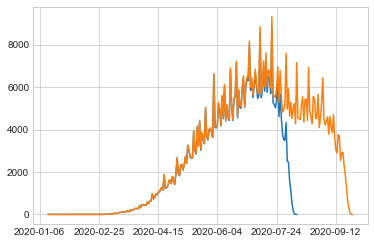

In [16]:
#c.iloc[0].plot()
#c.iloc[45].plot()
#c.iloc[105].plot()
#c.iloc[105].plot()
#
#c.iloc[115].plot()
#
#c.iloc[125].plot()
#
#c.iloc[135].plot()
#
w.iloc[120].plot()

w.iloc[167].plot()

In [ ]:
start = time.time()
datas = np.load(os.path.join(data_url,'200925COVID19MEXICO.npy'),
                           mmap_mode=None,
                           allow_pickle=True,
                           fix_imports=True,
                           encoding='latin1')
            
dates, confirmed_data = data_distribution(datas, 'MORELOS', 'confirmed', 'discrete')
end = time.time()
print(end-start)

In [ ]:
190/60


In [ ]:
import time

start = time.time()
for i in range(450):
    print('Popoirn')
    clear_output(wait=True)
end = time.time()
print(end-start)

# Death Rate functions

In [ ]:
def deathRate(state,trim):
    dates = pd.read_csv(database['deaths']).columns[3:]
    actives = Covid(state).actives(window=14)
    deaths = Covid(state).discrete('deaths')
    
    if len(actives)< len(deaths):
        deaths = deaths[len(deaths)-len(actives):]
        dates  = dates[len(dates)-len(actives):]
    else:
        actives = actives[len(actives)-len(deaths):]
        dates = dates[len(dates)-len(deaths):]
    
    plotDeathRate(state,dates,actives.actives.values,deaths,trim)
    
def deathRateByAge(state,start,end):
    deaths =  Covid(state).patients().deaths().age(start = start, end = end)
    alive =  Covid(state).patients().alive().age(start = start, end = end)
    deaths = len(deaths.data)
    alive = len(alive.data)
    try:
        result =  deaths/(alive/100)
    except:
        result = 0
    
    return result

def getageDeathRate(state):
    ageDeathRate = []
    for age in range(101):
        ageDeathRate.append(deathRateByAge(state,age,age))
    return ageDeathRate

def plotAgeDeathRate(state,trim):
    ageDeathRate = []
    for age in range(101):
        result = deathRateByAge(state,age,age)
        ageDeathRate.append(result)
        print(f'Done for age {age}: ',str(result) + ' %')
        clear_output(wait=True)
    
    plt.title('National Death Rate by Age', fontsize=25)
    plt.scatter([str(x) for x in range(101)],ageDeathRate,color='black')
    plt.xticks(fontsize=15,rotation=75)
    plt.yticks(fontsize=25)
    plt.ylabel('Death Rate', fontsize = 25)
    plt.xlabel('Age',fontsize=25)
    plt.xlim(trim,)
    plt.show()

In [ ]:
def plotAgeDeathRate(data,state,trim =0):
    
    
    if state not in ['all', 'nacional', 'national']:
        data = getStateData(data,state)
    ageDeathRate = []    
    ageRange = list(set(data[:,15]))
    for age in ageRange:
        if age > 101:
            continue
        ageData = getAgeData(data,age)
        total = len(ageData)
        deathData = getDeathData(ageData)
        try:
            ageDeathRate.append((len(deathData)/total)*100)
            
        except:
            ageDeathRate.append(0)
            
    return ageDeathRate

In [ ]:
a = plotAgeDeathRate(data,'all')

In [ ]:
plt.close('all')
plt.rcParams["figure.figsize"] = (25,6)
plt.title('Death proportion by Age', fontsize=22)
plt.ylabel('Percentage of Deaths', fontsize = 18)
plt.xlabel('Age', fontsize= 20)
plt.xticks(fontsize=15)
plt.scatter([x for x in range(len(a))],a, color = 'black')
plt.show()

In [ ]:
plt.plot([i for i in range(0,len(a))],a)

In [ ]:
[i for i in range(0,100)]

In [ ]:
today = str(confirmed_dates[-1])[:10]

In [ ]:
int(today[5:7])

In [ ]:
list(set(data[:,15]))

In [ ]:
#def generateDeaths(state = 'all', data_type = 'discrete'):
#    
#    if os.path.exists('processed/deaths/deaths_raw.pkl'):
#        deaths_raw = joblib.load('processed/deaths/deaths_raw.pkl')
#    else:
#        deaths_raw = {}
#        
#    existing_days = [x for x in  deaths_raw.keys()]
#    
#    for file in data_files:
#        
#        if file[:6] not in existing_days and file != 'columns.npy':
#            
#            data = np.load(os.path.join(data_url,file),
#                           mmap_mode=None,
#                           allow_pickle=True,
#                           fix_imports=True,
#                           encoding='latin1')
#            
#            dates, deaths_data = data_distribution(data, state, 'deaths', data_type)
#
#            deaths_raw[file[:6]] = {'dates':dates,
#                                 'data': deaths_data}
#            
#            print(f'Done for: {file[:6]}')
#            clear_output(wait=True)
#    
#    joblib.dump(deaths_raw,'processed/deaths/deaths_raw.pkl')
#    
#    start = min([min(deaths_raw[x]['dates']) for x in deaths_raw.keys()])
#    end = max([max(deaths_raw[x]['dates']) for x in deaths_raw.keys()])
#    
#    date_range = pd.date_range(start=start, end = end)
#    
#    deaths = padding(date_range, deaths_raw)
#    joblib.dump(deaths,'processed/deaths/deaths.pkl')
#    
#    return deaths
#
#def generateConfirmed(state = 'all', data_type = 'discrete'):
#    
#    if os.path.exists('processed/confirmed/confirmed_raw.pkl'):
#        confirmed_raw = joblib.load('processed/confirmed/confirmed_raw.pkl')
#    else:
#        confirmed_raw = {}
#        
#    existing_days = [x for x in  confirmed_raw.keys()]
#    
#    for file in data_files:
#        
#        if file[:6] not in existing_days and file != 'columns.npy':
#            
#            data = np.load(os.path.join(data_url,file),
#                           mmap_mode=None,
#                           allow_pickle=True,
#                           fix_imports=True,
#                           encoding='latin1')
#            
#            dates, confirmed_data = data_distribution(data, state, 'confirmed', data_type)
#
#            confirmed_raw[file[:6]] = {'dates':dates,
#                                 'data': confirmed_data}
#            
#            print(f'Done for: {file[:6]}')
#            clear_output(wait=True)
#    
#    joblib.dump(confirmed_raw,'processed/confirmed/confirmed_raw.pkl')
#    
#    start = min([min(confirmed_raw[x]['dates']) for x in confirmed_raw.keys()])
#    end = max([max(confirmed_raw[x]['dates']) for x in confirmed_raw.keys()])
#    
#    date_range = pd.date_range(start=start, end = end)
#    
#    confirmed = padding(date_range, confirmed_raw)
#    joblib.dump(confirmed,'processed/confirmed/confirmed.pkl')
#    
#    return confirmed
# def generateActives(state = 'all'):
    
#     if os.path.exists('processed/actives/actives_raw.pkl'):
#         actives_raw = joblib.load('processed/actives/actives_raw.pkl')
#     else:
#         actives_raw = {}
        
#     existing_days = [x for x in  actives_raw.keys()]
    
#     for file in data_files:
        
#         if file[:6] not in existing_days and file != 'columns.npy':
            
#             data = np.load(os.path.join(data_url,file),
#                            mmap_mode=None,
#                            allow_pickle=True,
#                            fix_imports=True,
#                            encoding='latin1')
#             dates, actives_data = data_distribution(data, state, 'actives', 'discrete')

#             actives_raw[file[:6]] = {'dates':dates,
#                                  'data': actives_data}
            
#             print(f'Done for: {file[:6]}')
#             clear_output(wait=True)
    
#     joblib.dump(actives_raw,'processed/actives/actives_raw.pkl')
    
#     start = min([min(actives_raw[x]['dates']) for x in actives_raw.keys()])
#     end = max([max(actives_raw[x]['dates']) for x in actives_raw.keys()])
    
#     date_range = pd.date_range(start=start, end = end)
    
#     actives = padding(date_range, actives_raw)
#     joblib.dump(actives,'processed/actives/actives.pkl')
    
#     return actives